In [2]:
from __future__ import division
import datetime as dt
from collections import OrderedDict
import sys, os
import dateutil.relativedelta as rd

import pandas as pd
import numpy as np

gtfstk_dir = '../../gtfstk/'
sys.path.append(gtfstk_dir)
import gtfstk as gt

data_dir = gtfstk_dir + 'data/'

%load_ext autoreload
%autoreload 2

# Comment out the next line if matplotlib is not installed
%matplotlib inline  


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Import a feed
feed = gt.read_gtfs(data_dir + 'cairns_gtfs.zip')

# Set study date
date = gt.compute_busiest_date(feed, gt.get_first_week(feed))
date

'20140530'

In [4]:
# Compute trips stats
trips_stats = gt.compute_trips_stats(feed)
trips_stats.head()

,trip_id,route_id,route_short_name,direction_id,shape_id,num_stops,start_time,end_time,start_stop_id,end_stop_id,is_loop,duration,distance,speed
703,CNS2014-CNS_MUL-Weekday-00-4165878,110-423,110,0,1100023,35,05:50:00,06:50:00,750337,750449,0,1.000000,32.507121,32.507121
0,CNS2014-CNS_MUL-Saturday-00-4165937,110-423,110,0,1100023,35,06:16:00,07:10:00,750337,750449,0,0.900000,32.507121,36.119024
704,CNS2014-CNS_MUL-Weekday-00-4165879,110-423,110,0,1100023,35,06:20:00,07:20:00,750337,750449,0,1.000000,32.507121,32.507121
705,CNS2014-CNS_MUL-Weekday-00-4165880,110-423,110,0,1100023,35,06:50:00,07:50:00,750337,750449,0,1.000000,32.507121,32.507121
706,CNS2014-CNS_MUL-Weekday-00-4165881,110-423,110,0,1100023,35,07:15:00,08:20:00,750337,750449,0,1.083333,32.507121,30.006574


In [5]:
# Add shape distance traveled field to stop times
feed.stop_times = gt.add_dist_to_stop_times(feed, trips_stats)
feed.stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled
17709,CNS2014-CNS_MUL-Saturday-00-4165937,06:16:00,06:16:00,750337,1,0,0,0.000000
17710,CNS2014-CNS_MUL-Saturday-00-4165937,06:16:00,06:16:00,750000,2,0,0,0.468640
17711,CNS2014-CNS_MUL-Saturday-00-4165937,06:18:00,06:18:00,750001,3,0,0,1.190380
17712,CNS2014-CNS_MUL-Saturday-00-4165937,06:20:00,06:20:00,750002,4,0,0,2.154785
17713,CNS2014-CNS_MUL-Saturday-00-4165937,06:21:00,06:21:00,750003,5,0,0,2.619003


In [6]:
# Get trips
gt.get_trips(feed, date).head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,110-423,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00-4165878,The Pier Cairns Terminus,0,NaN,1100023
1,110-423,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00-4165879,The Pier Cairns Terminus,0,NaN,1100023
2,110-423,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00-4165880,The Pier Cairns Terminus,0,NaN,1100023
3,110-423,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00-4165881,The Pier Cairns Terminus,0,NaN,1100023
4,110-423,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00-4165882,The Pier Cairns Terminus,0,NaN,1100023


In [7]:
# Compute stops stats for that date
stops_stats = gt.compute_stops_stats(feed, date, split_directions=True)
stops_stats.head()

,stop_id,direction_id,num_routes,num_trips,start_time,end_time,max_headway,min_headway,mean_headway
0,750000,0,2,34,05:50:00,27:50:00,34,23,29.863636
1,750001,0,2,34,05:52:00,27:51:00,35,23,29.909091
2,750002,0,2,34,05:54:00,27:52:00,35,23,29.909091
3,750003,0,2,34,05:55:00,27:52:00,35,23,29.909091
4,750004,0,2,34,05:57:00,27:53:00,34,23,29.863636


In [8]:
# Compute stops time series for that date
sts = gt.compute_stops_time_series(feed, date, split_directions=True)
sts = gt.downsample(sts, freq='6H')
sts.head()

indicator           num_trips                                            \
stop_id                750000 750001 750002 750003 750004 750005 750006   
direction_id                0      0      0      0      0      0      0   
2014-05-30 00:00:00         5      5      5      5      5      5      4   
2014-05-30 06:00:00        12     12     12     12     12     12     12   
2014-05-30 12:00:00        12     12     12     12     12     12     12   
2014-05-30 18:00:00         5      5      5      5      5      5      6   

indicator                                 ...                                \
stop_id             750007 750008 750009  ...   750437 750440 750448 750449   
direction_id             0      0      0  ...        0      1      0      0   
2014-05-30 00:00:00      4      4      4  ...        0      0      0      4   
2014-05-30 06:00:00     12     12     12  ...        6      5     10    110   
2014-05-30 12:00:00     12     12     12  ...        6      6      9    112   
2014-05-30 18:00:00      6      6      6  ...        4      6      2     67   

indicator                                                      
stop_id             750450 750452 750453 750454 750455 750456  
direction_id             1      1      1      1      0      1  
2014-05-30 00:00:00      5      0      5      0      0      5  
2014-05-30 06:00:00     36     28     25     11      4     46  
2014-05-30 12:00:00     44     31     33     12      6     57  
2014-05-30 18:00:00     21     22     16      5      5     22  

[4 rows x 469 columns]

In [9]:
# Compute routes stats for that date
routes_stats = gt.compute_routes_stats(feed, trips_stats, date, split_directions=True)
routes_stats.head()

,route_id,direction_id,route_short_name,num_trips,is_loop,start_time,end_time,max_headway,min_headway,mean_headway,peak_num_trips,peak_start_time,peak_end_time,service_distance,service_duration,is_bidirectional,service_speed,mean_trip_distance,mean_trip_duration
0,110-423,0,110,30,0,05:50:00,23:05:00,35,23,29.909091,3,18:13:00,18:20:00,975.213639,29.916667,1,32.597670,32.507121,0.997222
1,110-423,1,110,29,0,07:10:00,24:02:00,30,30,30.000000,2,07:40:00,08:08:00,919.009424,27.433333,1,33.499736,31.689980,0.945977
2,110N-423,0,110N,4,0,24:50:00,28:35:00,NaN,NaN,NaN,1,24:50:00,25:35:00,177.781479,3.000000,1,59.260493,44.445370,0.750000
3,110N-423,1,110N,5,0,24:40:00,29:39:00,NaN,NaN,NaN,1,24:40:00,25:39:00,221.727299,4.916667,1,45.097078,44.345460,0.983333
4,111-423,0,111,29,0,06:02:00,23:35:00,67,25,32.000000,3,06:57:00,07:05:00,1005.368216,30.366667,1,33.107625,34.667870,1.047126


/home/araichev/.virtualenvs/gtfstk/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/araichev/.virtualenvs/gtfstk/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/araichev/.virtualenvs/gtfstk/lib/python3.4/site-packages/pandas/tools/plotting.py:927: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


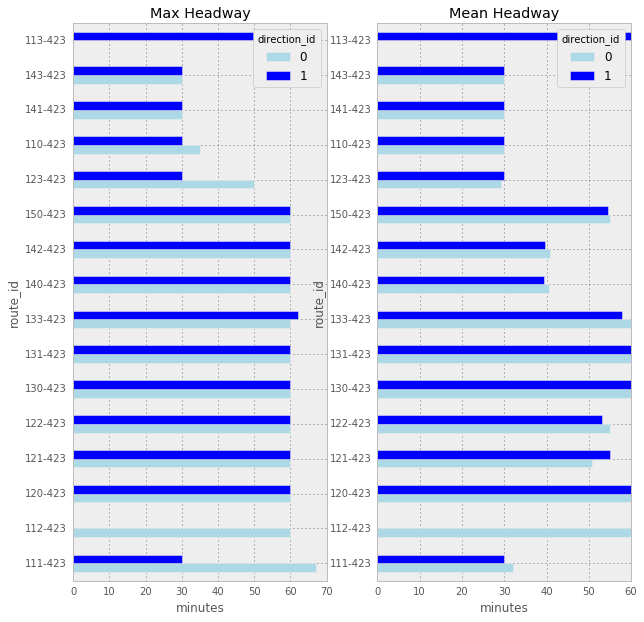

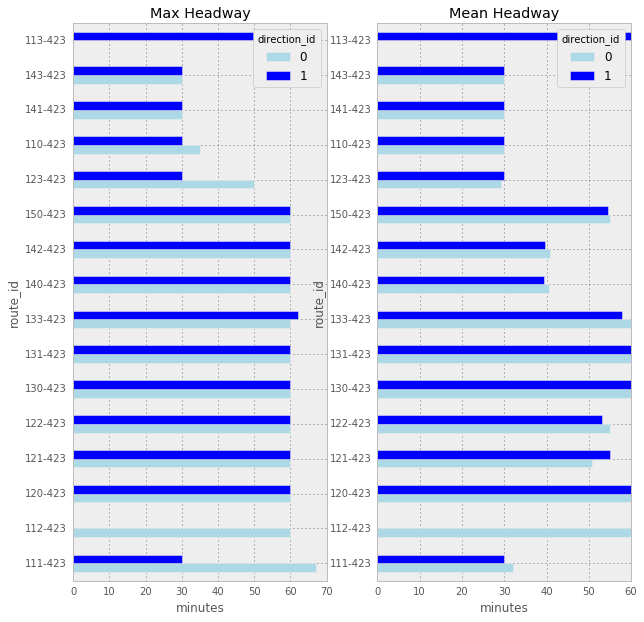

In [17]:
gt.plot_headways(routes_stats)

In [11]:
# Compute routes time series
rts = gt.compute_routes_time_series(feed, trips_stats, date, split_directions=True)
rts = gt.downsample(rts, freq='6H')
rts.head()

indicator           num_trip_starts                                      \
route_id                    110-423     110N-423    111-423     112-423   
direction_id                      0   1        0  1       0   1       0   
2014-05-30 00:00:00               1   0        4  5       0   0       0   
2014-05-30 06:00:00              12  10        0  0      12  10       5   
2014-05-30 12:00:00              12  12        0  0      12  12       6   
2014-05-30 18:00:00               5   7        0  0       5   7       4   

indicator                                 ...     service_speed             \
route_id            113-423    120-423    ...           142-423              
direction_id              0  1       0    ...                 0          1   
2014-05-30 00:00:00       0  0       1    ...               NaN        NaN   
2014-05-30 06:00:00       3  0       6    ...         25.915381  26.179643   
2014-05-30 12:00:00       0  2       6    ...         26.726927  26.179643   
2014-05-30 18:00:00       0  1       4    ...         26.726927  26.179643   

indicator                                                                  \
route_id               143-423              143W-423              150-423   
direction_id                 0          1          0         1          0   
2014-05-30 00:00:00        NaN        NaN        NaN       NaN        NaN   
2014-05-30 06:00:00  23.352055  25.496372        NaN       NaN  31.820862   
2014-05-30 12:00:00  23.352055  25.496372        NaN       NaN  31.820862   
2014-05-30 18:00:00  23.352055  25.496372  30.907527  29.87017  31.820862   

indicator                                             
route_id                         150E-423             
direction_id                 1          0          1  
2014-05-30 00:00:00        NaN        NaN        NaN  
2014-05-30 06:00:00  31.278634        NaN        NaN  
2014-05-30 12:00:00  31.278634        NaN        NaN  
2014-05-30 18:00:00  31.278634  33.833209  34.409551  

[4 rows x 200 columns]

In [12]:
f = gt.compute_feed_time_series(feed, trips_stats, date, freq='1H')
gt.downsample(f, freq='4H').head()


,num_trip_starts,service_distance,service_duration,num_trips,service_speed
2014-05-30 00:00:00,12,423.588152,8.850000,2.212500,47.863068
2014-05-30 04:00:00,81,1463.148646,49.183333,12.295833,29.748871
2014-05-30 08:00:00,164,3650.067131,128.216667,32.054167,28.467962
2014-05-30 12:00:00,162,3507.673152,123.350000,30.837500,28.436750
2014-05-30 16:00:00,149,3511.544548,119.900000,29.975000,29.287277


In [13]:
# Get trip locations for every hour of the given date
rng = pd.date_range('1/1/2000', periods=24, freq='H')
times = [t.strftime('%H:%M:%S') for t in rng]
loc = gt.compute_trips_locations(feed, date, times)
loc.head()

,trip_id,rel_dist,time,route_id,direction_id,shape_id,lon,lat
0,CNS2014-CNS_MUL-Weekday-00-4165878,0.152945,06:00:00,110-423,0,1100023,145.669490,-16.762839
1,CNS2014-CNS_MUL-Weekday-00-4165879,0.720587,07:00:00,110-423,0,1100023,145.732413,-16.865060
2,CNS2014-CNS_MUL-Weekday-00-4165880,0.152945,07:00:00,110-423,0,1100023,145.669490,-16.762839
3,CNS2014-CNS_MUL-Weekday-00-4165881,0.720587,08:00:00,110-423,0,1100023,145.732413,-16.865060
4,CNS2014-CNS_MUL-Weekday-00-4165882,0.202283,08:00:00,110-423,0,1100023,145.675422,-16.768954


In [14]:
# Get a route timetable
route = feed.routes['route_id'].iat[0]
gt.get_route_timetable(feed, route, date).head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled
0,110-423,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00-4165878,The Pier Cairns Terminus,0,NaN,1100023,05:50:00,05:50:00,750337,1,0,0,0.000000
1,110-423,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00-4165878,The Pier Cairns Terminus,0,NaN,1100023,05:50:00,05:50:00,750000,2,0,0,0.468640
2,110-423,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00-4165878,The Pier Cairns Terminus,0,NaN,1100023,05:52:00,05:52:00,750001,3,0,0,1.190380
3,110-423,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00-4165878,The Pier Cairns Terminus,0,NaN,1100023,05:54:00,05:54:00,750002,4,0,0,2.154785
4,110-423,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00-4165878,The Pier Cairns Terminus,0,NaN,1100023,05:55:00,05:55:00,750003,5,0,0,2.619003


In [15]:
# Get a stop time table
stop = feed.stops['stop_id'].iat[0]
gt.get_stop_timetable(feed, stop, date).head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled,route_id,service_id,trip_headsign,direction_id,block_id,shape_id
1,CNS2014-CNS_MUL-Weekday-00-4165878,05:50:00,05:50:00,750000,2,0,0,0.46864,110-423,CNS2014-CNS_MUL-Weekday-00,The Pier Cairns Terminus,0,NaN,1100023
36,CNS2014-CNS_MUL-Weekday-00-4165879,06:20:00,06:20:00,750000,2,0,0,0.46864,110-423,CNS2014-CNS_MUL-Weekday-00,The Pier Cairns Terminus,0,NaN,1100023
71,CNS2014-CNS_MUL-Weekday-00-4165880,06:50:00,06:50:00,750000,2,0,0,0.46864,110-423,CNS2014-CNS_MUL-Weekday-00,The Pier Cairns Terminus,0,NaN,1100023
106,CNS2014-CNS_MUL-Weekday-00-4165881,07:16:00,07:16:00,750000,2,0,0,0.46864,110-423,CNS2014-CNS_MUL-Weekday-00,The Pier Cairns Terminus,0,NaN,1100023
141,CNS2014-CNS_MUL-Weekday-00-4165882,07:46:00,07:46:00,750000,2,0,0,0.46864,110-423,CNS2014-CNS_MUL-Weekday-00,The Pier Cairns Terminus,0,NaN,1100023
